# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft

In [41]:
DEVICE = 'cuda:0'
NDIM = 1  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds

In [51]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.001):
    y = (z-0.5)*15
    l = np.array([np.cos(y).prod()])
    n = np.random.randn(1)*sigma
    return l + n

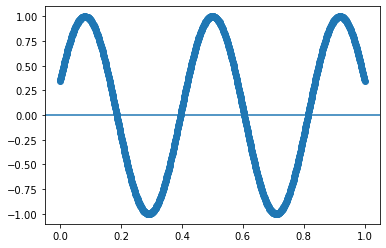

In [52]:
z0list = np.linspace(0, 1, 1000)
xlist = []
for i in range(len(z0list)):
    z = np.random.rand(NDIM)
    z[0] = z0list[i]
    x = model(z)
    xlist.append(x)
    
plt.scatter(z0list, xlist)
x0 = np.array([0.])
plt.axhline(x0)

In [71]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [72]:
for i in range(NROUNDS):
    sw.round(n_sims = 10000, n_train = 3000, lr = 1e-4, n_particles = 4)

 49%|████▉     | 4897/10000 [00:00<00:00, 48967.24it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 3/3000 [00:00<01:45, 28.42it/s]

Network optimization


100%|██████████| 3000/3000 [01:54<00:00, 26.17it/s]


In [73]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

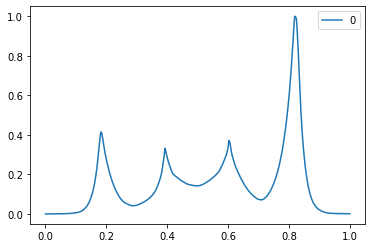

In [74]:
for i in range(NROUNDS):
    plt.plot(post[i][0]['z'], np.exp(post[i][0]['lnL']), label=i)
plt.legend()